# PREDICTING IMDB SCORE!
# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport # pip install pandas-profiling[notebook]
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
dataset = pd.read_csv('movie_metadata.csv')
dataset.shape

(5043, 28)

# Getting columns with categorical data and numerical data

In [3]:
#Getting columns with categorical data and numerical data
num_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']
char_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
num_cols, char_cols

(['num_critic_for_reviews',
  'duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_1_facebook_likes',
  'gross',
  'num_voted_users',
  'cast_total_facebook_likes',
  'facenumber_in_poster',
  'num_user_for_reviews',
  'budget',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'aspect_ratio',
  'movie_facebook_likes'],
 ['color',
  'director_name',
  'actor_2_name',
  'genres',
  'actor_1_name',
  'movie_title',
  'actor_3_name',
  'plot_keywords',
  'movie_imdb_link',
  'language',
  'country',
  'content_rating'])

# Correlational matrix 

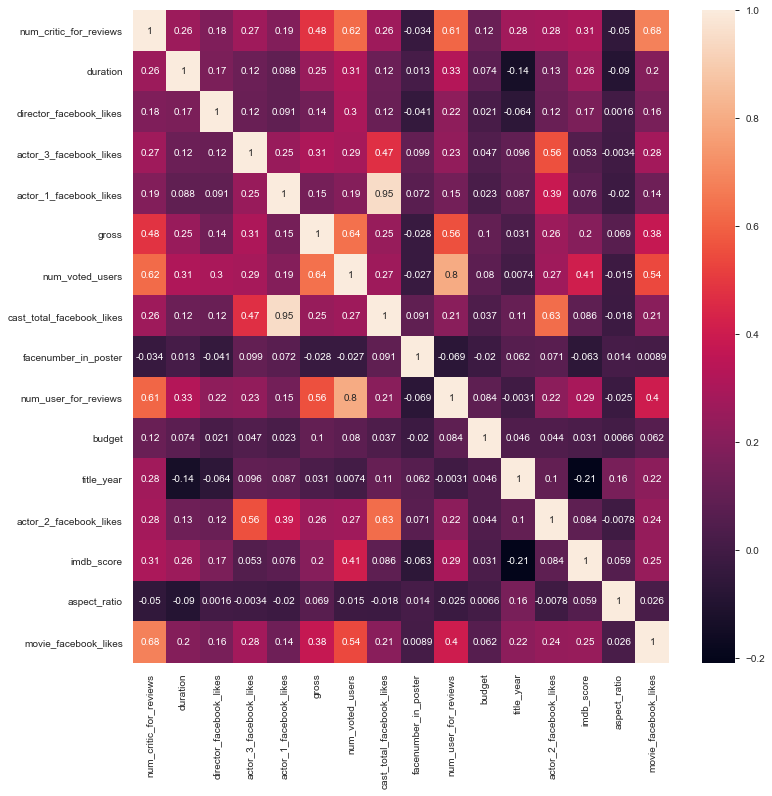

In [4]:
corr_matrix = dataset.corr()
plt.figure(figsize= (12,12))
sns.heatmap(corr_matrix, annot=True)

# Generating a profile report 
PS: Here I have not included the profile report as the file size increases drastically 

In [ ]:
#Generating an entire report of dataset
dataset.profile_report()

# Data Cleaning

Removing duplicated values

In [6]:
#Removing duplicated values
dataset.drop_duplicates(subset='movie_title',keep='first',inplace = True)
dataset.shape

(4917, 28)

In [7]:
dataset.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

Removing all null values of gross since it has a negative effect on the accuracy and rsme 

In [8]:
dataset = dataset.dropna(axis = 0, subset = ['gross'])
dataset.shape

(4054, 28)

Printing null values of each columnn

In [9]:
dataset.isnull().sum()

color                          2
director_name                  2
num_critic_for_reviews         3
duration                       2
director_facebook_likes        2
actor_3_facebook_likes        13
actor_2_name                   6
actor_1_facebook_likes         4
gross                          0
genres                         0
actor_1_name                   4
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  13
facenumber_in_poster           7
plot_keywords                 40
movie_imdb_link                0
num_user_for_reviews           1
language                       3
country                        0
content_rating                63
budget                       265
title_year                     2
actor_2_facebook_likes         6
imdb_score                     0
aspect_ratio                 104
movie_facebook_likes           0
dtype: int64

Removing all null values in budget since it has a negative effect on accuracy and rsme 

In [10]:
dataset = dataset.dropna(axis = 0, subset = ['budget'])
dataset.shape

(3789, 28)

In [11]:
dataset.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      3
country                       0
content_rating               51
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 74
movie_facebook_likes          0
dtype: int64

Filling color, language, content_rating with most frequent value in column

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(dataset[['color','language','content_rating']])
dataset[['color','language','content_rating']] = imputer.transform(dataset[['color','language','content_rating']])

In [13]:
dataset.isnull().sum()

color                         0
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes       10
actor_2_name                  5
actor_1_facebook_likes        3
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          6
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      0
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        5
imdb_score                    0
aspect_ratio                 74
movie_facebook_likes          0
dtype: int64

Filling numerical columns with median value in column

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(dataset[num_cols])
dataset[num_cols] = imputer.transform(dataset[num_cols])

In [15]:
dataset.isnull().sum()

color                         0
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  5
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  3
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                 10
facenumber_in_poster          0
plot_keywords                31
movie_imdb_link               0
num_user_for_reviews          0
language                      0
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                  0
movie_facebook_likes          0
dtype: int64

Removing columns which contains names of director and actors because they dont give value to the predictions. 
Plot keyword does not have much influence on data hence it has been removed 
Removing movie_imdb_link as it has no use towards the prediction.
This has been done after a lot of permutations and combinations by trial and error

In [16]:
dataset = dataset.drop(columns = ['director_name','actor_2_name','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link'], axis=1)

In [17]:
dataset.isnull().sum()

color                        0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
genres                       0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

(Optional) To see entire dataset

In [18]:
# #To see entire dataset
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)
# pd.options.display.max_rows
# pd.set_option('display.max_rows', None)

# Removing the columns country, content_rating and color as prediction accuracy is the maximum with only languages

In [19]:
dataset = dataset.drop(columns = ['country'], axis=1)

In [20]:
dataset = dataset.drop(columns = ['content_rating'], axis=1)

In [21]:
dataset = dataset.drop(columns = ['color'], axis=1)

# Dataset index has been reset 

In [22]:
dataset.reset_index(inplace = True, drop = True)

# Unique values in genre

In [23]:
genre = dataset.iloc[:, dataset.columns.get_loc('genres')].values
a = []
unique = [x.split('|') for x in genre]
for x in unique:
    for y in x:
        a.append(y)
a = set(a)

# Creating null columns for all unique values

In [24]:
for x in a:
    dataset[x] = np.nan

# Encoding the data in the form of 0's and 1's


In [25]:
for x in a:
    for i in range(0,len(dataset)):
        if x in unique[i]:
            dataset[x][i] = 1
        else:
            dataset[x][i] = 0

/Users/n_rishabh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/n_rishabh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Removing column genre 

In [26]:
dataset = dataset.drop(columns = ['genres'], axis=1)

# Encoding language using pd.get_dummies 

In [27]:
dataset = pd.get_dummies(dataset, columns=['language'], prefix = ['language'])

In [28]:
dataset.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,language_Persian,language_Portuguese,language_Romanian,language_Russian,language_Spanish,language_Swedish,language_Telugu,language_Thai,language_Vietnamese,language_Zulu
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204.0,4834.0,0.0,3054.0,...,0,0,0,0,0,0,0,0,0,0
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220.0,48350.0,0.0,1238.0,...,0,0,0,0,0,0,0,0,0,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868.0,11700.0,1.0,994.0,...,0,0,0,0,0,0,0,0,0,0
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337.0,106759.0,0.0,2701.0,...,0,0,0,0,0,0,0,0,0,0
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204.0,1873.0,1.0,738.0,...,0,0,0,0,0,0,0,0,0,0


# Independent variables selection

In [29]:
X = dataset.iloc[:,dataset.columns != 'imdb_score'].values

# Dependent variables selection 

In [30]:
y = dataset.iloc[:,dataset.columns.get_loc('imdb_score')].values

# Splitting into training and test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 29)

# Training the model

Random Forest Regression

In [32]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state=12)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=12)

# Evaluating the model

Predicting the output

In [33]:
y_pred = regressor.predict(X_test)

Finding accuracy of the model

In [34]:
score = regressor.score(X_test, y_test)
print(f'Accuracy: {score*100}%')

Accuracy: 63.419206953737074%


In [35]:
rss=((y_test-y_pred)**2).sum()
mse=np.mean((y_test-y_pred)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 0.6482962143421346


# Predicted IMDB rating for few random samples in the dataset

In [36]:
import random
print(f'Actual Value  |  Predicted Value')
print('---------------------------------')
for x in range(0,10):
    num = random.randint(0,100)
    print(f'   {y_test[num]}        |      {y_pred[num]:.1f}')

Actual Value  |  Predicted Value
---------------------------------
   3.6        |      4.9
   7.2        |      7.4
   6.4        |      5.9
   6.9        |      6.6
   6.9        |      6.9
   5.4        |      6.2
   5.2        |      7.2
   7.5        |      7.3
   6.1        |      6.1
   7.0        |      7.4
